/opt/anaconda3/envs/tora/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,569 (115.50 KB)

 Trainable params: 29,569 (115.50 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 128)            │        12,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,569 (115.50 KB)

 Trainable params: 29,569 (115.50 KB)

 Non-trainable params: 0 (0.00 B)



782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.6771 - binary_crossentropy: 0.6406 - loss: 0.6406
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 430us/step - accuracy: 0.7049 - binary_crossentropy: 0.5747 - loss: 0.5747

scores_basic:  0.6333177089691162
scores_dropout:  0.5751503109931946


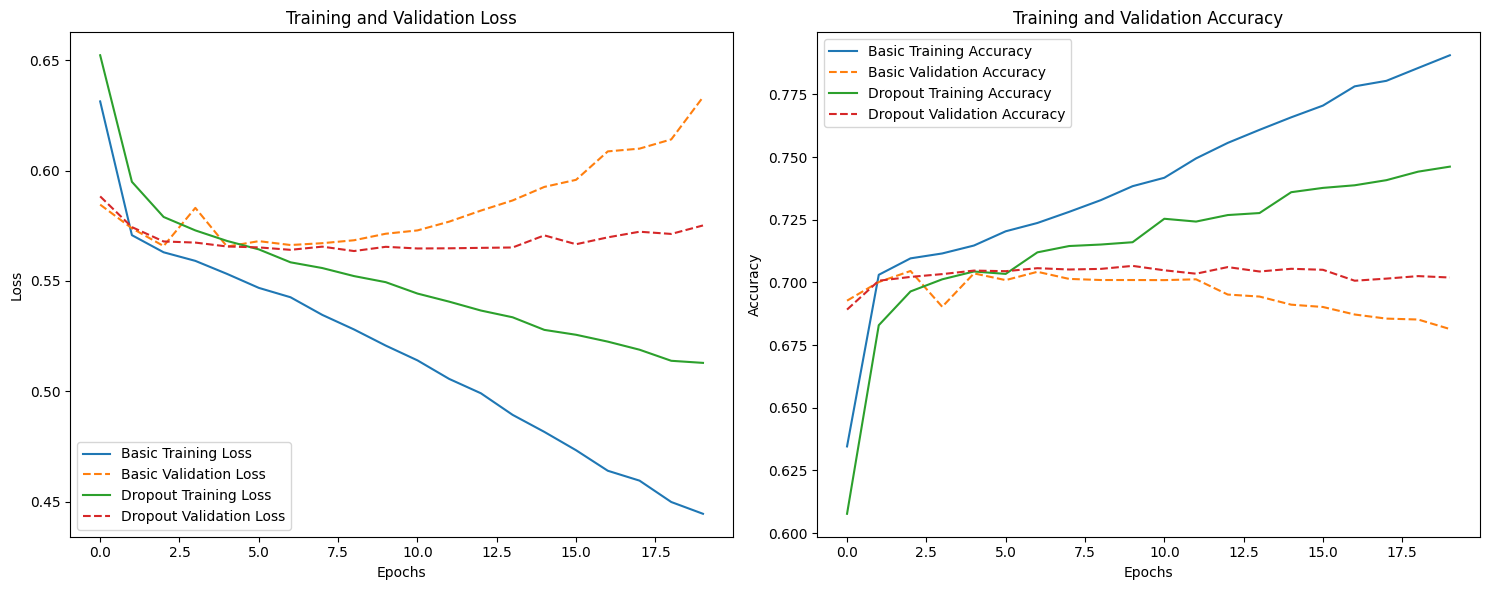

In [5]:
import numpy as np
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
        
    return results
    
'''
1. 드롭 아웃을 적용할 모델과 비교하기 위한
   하나의 기본 모델을 자유롭게 생성합니다.
'''

def Basic(word_num):
    
    basic_model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape = (word_num,), activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
        
        ])
    
    return basic_model
    
'''
2. 기본 모델에 드롭 아웃 레이어를 추가합니다.
   일반적으로 마지막 히든층과 출력층 사이에 하나만 추가합니다.
   드롭 아웃 적용 확률은 자유롭게 설정하세요.
'''

def Dropout(word_num):
    
    dropout_model =  tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape = (word_num,), activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
        
        ])
    
    return dropout_model

'''
3. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Basic, Dropout 함수를 이용해 두 모델을 불러옵니다.
   
   Step02. 두 모델의 손실 함수, 최적화 알고리즘, 
           평가 방법을 설정합니다.
   
   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 두 모델을 학습시킵니다. 
           두 모델 모두 'epochs'는 20,
           'batch_size'는 500으로 설정합니다. 
           검증용 데이터도 설정해주세요.
   
   Step05. 두 모델을 테스트하고 
           binary crossentropy 점수를 출력합니다. 
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''


def main():
    
    word_num = 100
    data_num = 25000
    
    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.
    
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)
    train_labels = train_labels.reshape(-1, 1)  # (500,) -> (500, 1)
    test_labels = test_labels.reshape(-1, 1)    # (500,) -> (500, 1)
    
    basic_model = Basic(word_num)    # 기본 모델입니다.
    dropout_model = Dropout(word_num)  # 드롭 아웃을 적용할 모델입니다.
    
    basic_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy', 'binary_crossentropy'])
    dropout_model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy', 'binary_crossentropy'])
    
    basic_model.summary()
    dropout_model.summary()
    
    basic_history = basic_model.fit(train_data , train_labels , epochs = 20, batch_size= 500 , validation_data = (test_data, test_labels) , verbose=0)
    print('\n')
    dropout_history = dropout_model.fit(train_data, train_labels, epochs = 20, batch_size = 500 , validation_data = (test_data, test_labels) , verbose= 0)
    
    scores_basic = basic_model.evaluate(test_data, test_labels)
    scores_dropout = dropout_model.evaluate(test_data,test_labels)
    
    print('\nscores_basic: ', scores_basic[-1])
    print('scores_dropout: ', scores_dropout[-1])
    
    return basic_history, dropout_history
import matplotlib.pyplot as plt

def additional_visualization(histories):
    """
    각 모델의 학습 및 검증 손실과 정확도를 시각화
    :param histories: 학습 기록 리스트 (이름, history 튜플 형태)
    """
    plt.figure(figsize=(15, 6))
    
    # 학습 및 검증 손실 시각화
    plt.subplot(1, 2, 1)
    for name, history in histories:
        plt.plot(history.history['loss'], label=f'{name} Training Loss')
        plt.plot(history.history['val_loss'], label=f'{name} Validation Loss', linestyle='--')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 학습 및 검증 정확도 시각화
    plt.subplot(1, 2, 2)
    for name, history in histories:
        plt.plot(history.history['accuracy'], label=f'{name} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy', linestyle='--')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


# 메인 함수 이후에 시각화 호출
if __name__ == "__main__":
    basic_history, dropout_history = main()  # 학습 기록 반환

    histories = [
        ('Basic', basic_history),
        ('Dropout', dropout_history)
    ]
    additional_visualization(histories)